In [1]:
import numpy as np

from src.metrics.ece import ece

In [2]:

predictions = (np.random.rand(10000) + 1) / 2
predictions = np.column_stack((predictions, 1 - predictions))
labels = np.array(np.argmax(predictions, axis=1), dtype=np.int8)
true_ece = 0.05

ece_val, bin_counts = ece(predictions, labels, n_bins=15, return_bin_counts=True)

In [3]:
print(ece_val)

0.24969297979101224


In [4]:
print(bin_counts)

[   0    0    0    0    0    0    0  671 1338 1292 1361 1347 1310 1315
 1366]


In [5]:

import pickle
from src.data_generation.datasets import gummy_worm_dataset_family
from sklearn.model_selection import train_test_split

datasets = gummy_worm_dataset_family()

X_trains = []
y_trains = []
X_tests = []
y_tests = []

for dataset in datasets:
    samples, labels = dataset.generate_data(10000)    
    X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.5, random_state=42)
    
    X_trains.append(X_train)
    y_trains.append(y_train)
    X_tests.append(X_test)
    y_tests.append(y_test)

# ensure numpy
X_trains = np.array(X_trains)
y_trains = np.array(y_trains)
X_tests = np.array(X_tests)
y_tests = np.array(y_tests)

print(X_trains.shape)
print(y_trains.shape)
print(X_tests.shape)
print(y_tests.shape)

subsample_sizes = np.linspace(100, 20000, 200, dtype=np.int64)
#for filename in filenames:
filename = "../varying_test_sample_size_dataset_family/data/Gummy Worm Dataset__SVM__Gummy Worm Dataset Family__AbsoluteValues__20250405_032919.pkl"
with (open(filename, 'rb') as file):
    print(filename)
    results = pickle.load(file)
    
    ece_values = results["Means"]["ECE"]
    estimators = results['Estimators']

(20, 20000, 2)
(20, 20000)
(20, 20000, 2)
(20, 20000)
../varying_test_sample_size_dataset_family/data/Gummy Worm Dataset__SVM__Gummy Worm Dataset Family__AbsoluteValues__20250405_032919.pkl


In [6]:
bin_countsss = []
avg_eces = []
selected_sample_sizes = np.array([2500, 5000, 6300, 8800, 12500, 15000])
for sample_size in selected_sample_sizes:
    eces = []
    bin_countss = []
    for i, estimator in enumerate(estimators):
        p_pred = estimator.predict_proba(X_tests[i, :sample_size, :])
        ECE, bin_counts = ece(p_pred, y_tests[i, :sample_size], 15, return_bin_counts=True)
        bin_countss.append(bin_counts)
        eces.append(ECE)
    bin_countsss.append(bin_countss)
    avg_eces.append(np.mean(eces))
        
bin_countsss = np.array(bin_countsss)
avg_eces = np.array(avg_eces)

In [7]:
print(bin_countsss)
print(avg_eces)

[[[    0     0     0 ...    94   214  1931]
  [    0     0     0 ...    55   133  2188]
  [    0     0     0 ...    15    22  2433]
  ...
  [    0     0     0 ...    49   105  2217]
  [    0     0     0 ...   110   163  1986]
  [    0     0     0 ...   101   206  1944]]

 [[    0     0     0 ...   183   422  3891]
  [    0     0     0 ...   125   261  4347]
  [    0     0     0 ...    28    51  4858]
  ...
  [    0     0     0 ...   110   205  4439]
  [    0     0     0 ...   213   363  3936]
  [    0     0     0 ...   206   450  3878]]

 [[    0     0     0 ...   240   540  4861]
  [    0     0     0 ...   164   325  5480]
  [    0     0     0 ...    37    60  6119]
  ...
  [    0     0     0 ...   144   247  5596]
  [    0     0     0 ...   266   456  4964]
  [    0     0     0 ...   257   560  4887]]

 [[    0     0     0 ...   332   748  6816]
  [    0     0     0 ...   229   446  7651]
  [    0     0     0 ...    48    79  8549]
  ...
  [    0     0     0 ...   202   361  7796]
  

[   0.      0.      0.      0.      0.      0.      0.     14.3    26.75
   30.6    34.55   43.05   62.7   133.5  2154.55]
[   0.      0.      0.      0.      0.      0.      0.     28.75   56.05
   60.55   67.85   84.45  125.    271.15 4306.2 ]
[   0.      0.      0.      0.      0.      0.      0.     35.85   69.8
   78.15   85.25  108.6   159.05  343.1  5420.2 ]
[   0.      0.      0.      0.      0.      0.      0.     50.15   99.8
  110.95  118.55  147.55  217.25  477.7  7578.05]
[    0.       0.       0.       0.       0.       0.       0.      71.25
   142.     155.3    167.5    209.9    306.7    677.   10770.35]
[    0.       0.       0.       0.       0.       0.       0.      85.45
   169.3    186.3    200.8    254.6    368.35   815.8  12919.4 ]


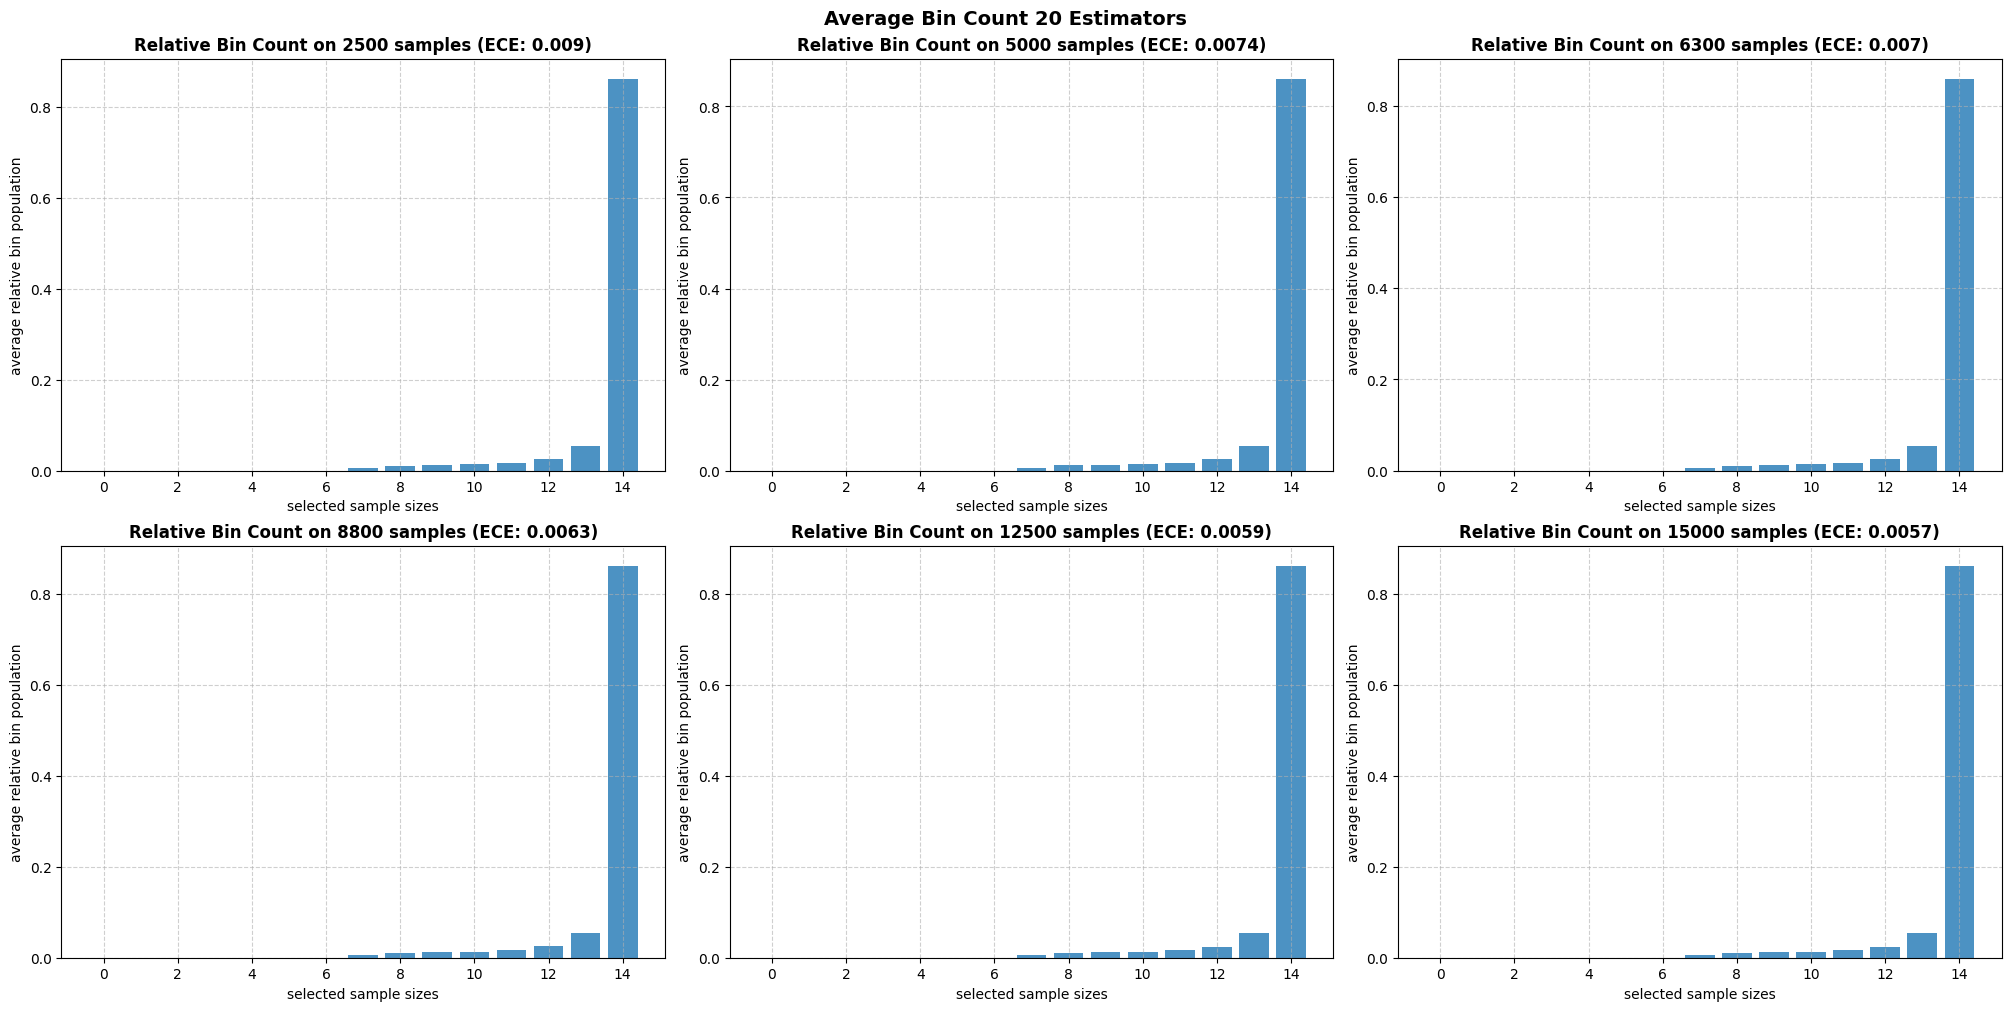

In [8]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(20, 10), constrained_layout=True)
axs = axs.flatten()

for i, sample_size in enumerate(selected_sample_sizes):
    print(np.mean(bin_countsss[i], axis=0))
    ax = axs[i]
    ax.bar(range(15), np.mean(bin_countsss[i], axis=0) / sample_size, alpha=0.8)
    ax.set_xlabel("selected sample sizes")
    ax.set_ylabel("average relative bin population")
    ax.set_title(f"Relative Bin Count on {sample_size} samples (ECE: {np.round(avg_eces[i], decimals=4)})", fontsize=12, fontweight="bold")
    ax.grid(True, linestyle='--', alpha=0.6)
    
plt.suptitle(f"Average Bin Count 20 Estimators", fontsize=14, fontweight="bold")
#plt.savefig("./")
plt.show()

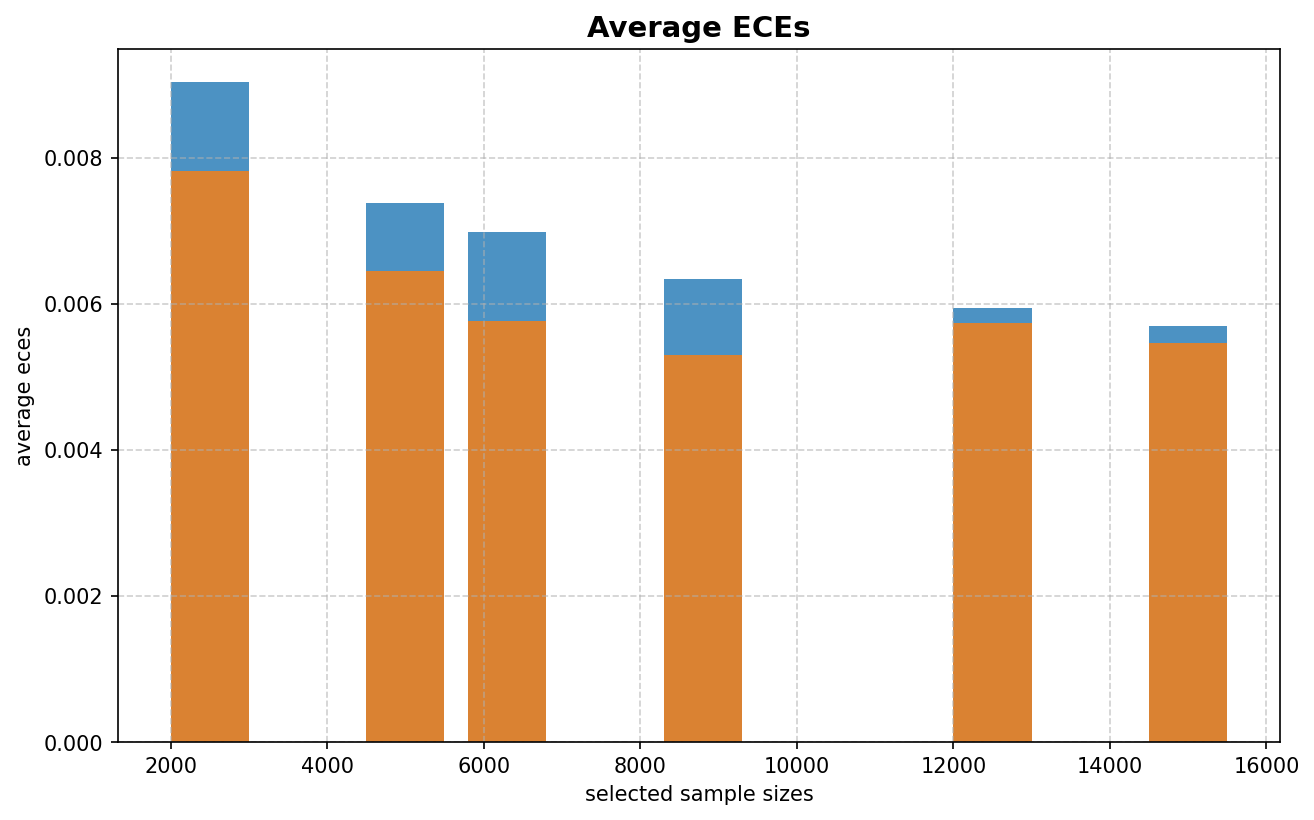

In [14]:
selected_indices = (selected_sample_sizes/100).astype(np.int32) - 1

selected_ece_values = np.array(ece_values)[selected_indices]

plt.figure(figsize=(10, 6), dpi=150)
plt.bar(selected_sample_sizes, avg_eces, width=1000, alpha=0.8)
plt.bar(selected_sample_sizes, selected_ece_values, width=1000, alpha=0.8)
plt.xlabel("selected sample sizes")
plt.ylabel("average eces")
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("Average ECEs", fontsize=14, fontweight="bold")
#plt.savefig("./")
plt.show()